In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
%matplotlib inline

In [24]:
train_df = pd.read_csv('train.csv')
train_df

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [25]:
train_df.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [26]:
train_y = train_df.survived
train_y.describe()

count    627.000000
mean       0.387560
std        0.487582
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [27]:
train_features =['age','fare',]
train_x = train_df[train_features]
print(train_x.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  28.0   8.4583


In [28]:
train_x.describe(),train_y.describe()

(              age        fare
 count  627.000000  627.000000
 mean    29.631308   34.385399
 std     12.511818   54.597730
 min      0.750000    0.000000
 25%     23.000000    7.895800
 50%     28.000000   15.045800
 75%     35.000000   31.387500
 max     80.000000  512.329200,
 count    627.000000
 mean       0.387560
 std        0.487582
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: survived, dtype: float64)

In [30]:
from sklearn.tree import DecisionTreeRegressor
train_model=DecisionTreeRegressor(random_state=1)
train_model.fit(train_x,train_y)
prediction = train_model.predict(train_x.head())
print("the predicted values would be:" ,prediction)


the predicted values would be: [0. 1. 1. 1. 0.]


In [31]:
from sklearn.metrics import mean_absolute_percentage_error
pred = train_model.predict(train_x)
print(type(mean_absolute_percentage_error))
mae = mean_absolute_percentage_error(pred,train_y)
print("the absolute error value is:",mae)


<class 'function'>
the absolute error value is: 0.11483253588516747


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,random_state=0)

train_model = DecisionTreeRegressor()
train_model.fit(train_x,train_y)
val_prediction = train_model.predict(val_x)
print(val_y)

513    1
549    0
103    1
230    1
318    0
      ..
608    1
440    1
386    1
173    0
96     1
Name: survived, Length: 157, dtype: int64


In [33]:
print(mean_absolute_error(val_y,val_prediction))

0.3483883420189153


In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes,train_x,val_x,train_y,val_y):
    train_model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,random_state=0)
    train_model.fit(train_x,train_y)
    train_val = train_model.predict(val_x)
    mae = mean_absolute_error(val_y,train_val)
    return mae
for max_leaf_nodes in [2,3,4,5]:
    my_mae = get_mae(max_leaf_nodes,train_x,val_x,train_y,val_y)
    print("max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes,my_mae))

max leaf nodes: 2 		 Mean Absolute Error: 0
max leaf nodes: 3 		 Mean Absolute Error: 0
max leaf nodes: 4 		 Mean Absolute Error: 0
max leaf nodes: 5 		 Mean Absolute Error: 0


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
train_model=RandomForestRegressor(random_state=0)
train_model.fit(train_x,train_y)
train_val = train_model.predict(train_x)
mae=mean_absolute_error(train_val,train_y)
print(mae)

0.16884270090047626


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style 


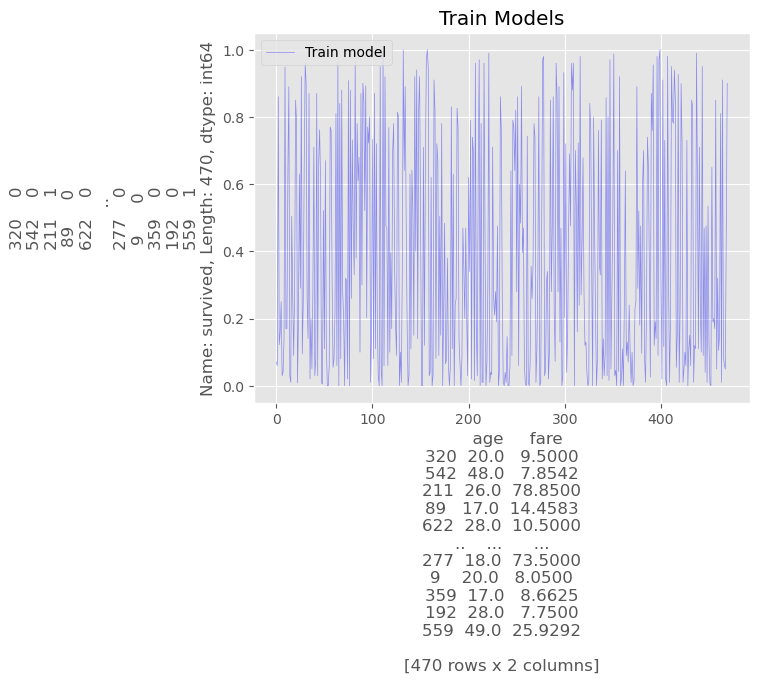

In [51]:
style.use('ggplot')
plt.plot(train_val,color='b',label='Train model',alpha=.4,linewidth=0.5)
plt.xlabel(train_x)
plt.ylabel(train_y)
plt.title('Train Models')
plt.legend()
plt.show()